# Song Popularity Prediction
Applied Machine Leaning Project

## Importing the basic libraries
We utilized three libraries for this project:

- numpy: For scientific calculation.
- pandas: To analyze data, import, and manage datasets.
- matplotlib: To create static, animated, and interactive visualizations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the Dataset

In [3]:
dataset = pd.read_csv('song_data.csv')

## Data Preparation
We dropped the song_name column from our dataset as it was deemed not useful for our prediction model. We then separated our dataset into independent variables (X) and the dependent variable (Y), which is song_popularity.

In [7]:
dataset=dataset.drop("song_name", axis=1)
X = dataset[dataset.columns.difference(['song_popularity'])]
Y = dataset['song_popularity']

## Dataset Visualization
We presented the dataset features using histograms.

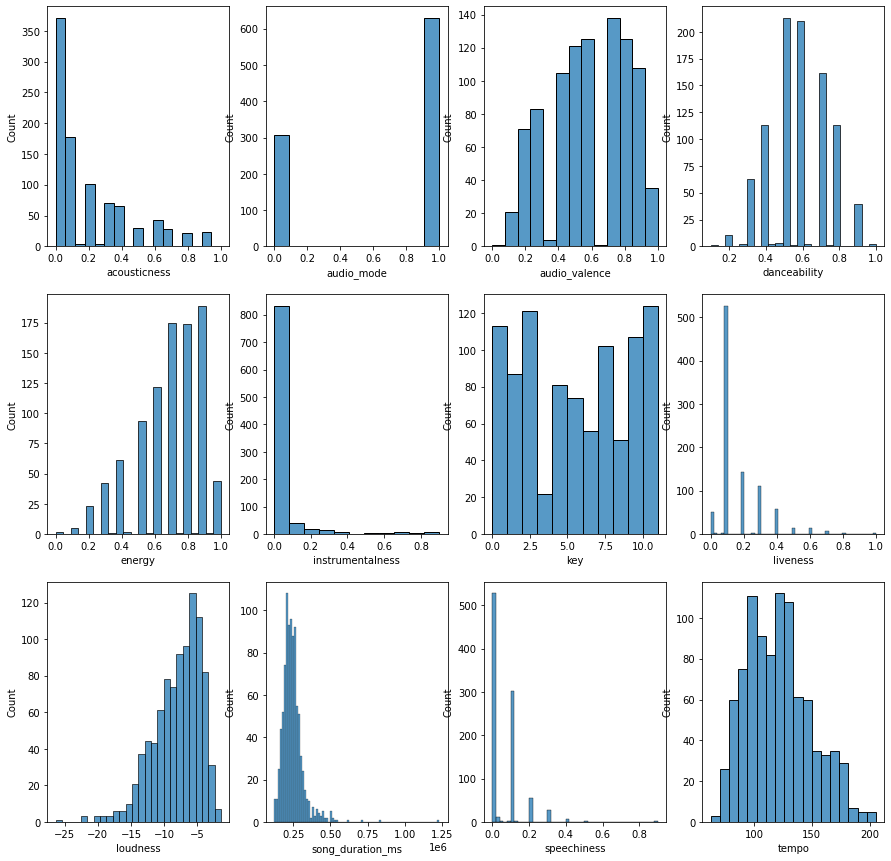

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

figure, axs = plt.subplots(3, 4)
figure.set_size_inches(15, 15)
cols = X.columns

for i in range(3):
    for j in range(4):
        sns.histplot(X[cols[4*i+j]], ax=axs[i, j])

## Feature Selection
We used SelectKBest from sklearn.feature_selection with f_classif to select the 13 most significant features.

In [9]:
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.feature_selection import chi2,mutual_info_classif,f_regression,f_classif
#Changing our output from a continuous value to two labels: 1 if the song is popular, 0 if the song isn't.
#The threshold is selected using data from billboard chart data. 
y_log = pd.cut(x=dataset["song_popularity"], bins=[-1,42,100], labels=[0,1]) ## Threshold can be either 50 or 26 (mean)

#Manually varying k again leads to plateau in accuracy scores after around k=13
X_log = SelectKBest(f_classif, k=13).fit_transform(X, y_log)


## Splitting the Dataset

We split our dataset into a training set (70%) and a test set (30%).

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.30, random_state=42)

## Training the Model

We trained a Logistic Regression model on the training set.

In [11]:
from sklearn.linear_model import LogisticRegression, LinearRegression
log_clf = LogisticRegression(random_state=42).fit(X_train, y_train)
from joblib import dump
dump(log_clf, "LogisticRegression")

['LogisticRegression']

## Confusion Matrix

We evaluated the accuracy of our model using a confusion matrix.

In [13]:
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[  0  33]
 [  0 249]]


## Model Evaluation - ROC curve to evaluate the model performance.

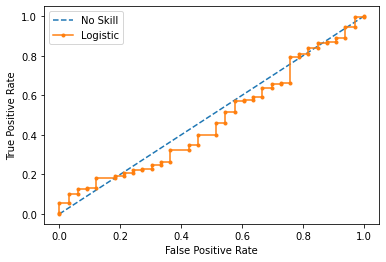

In [14]:
from sklearn import metrics
from matplotlib import pyplot
Y_pred = log_clf.predict_proba(X_test)[::,1]
fpr, tpr,thresholds = metrics.roc_curve(y_test, Y_pred)
#Create ROC curve
np.save("fpr_LR", fpr)
np.save("tpr_LR", tpr)
#Plot the ROC curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
#Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
#Show the plot
pyplot.show()

## Model Evaluation - AUC curve to quantify the overall performance of our model.

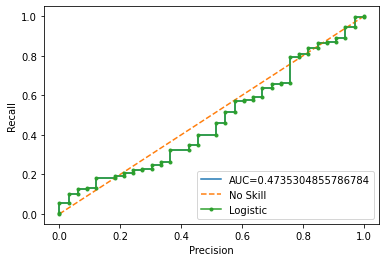

In [15]:
Y_pred = log_clf.predict_proba(X_test)[::,1]
fpr, tpr,thresholds= metrics.roc_curve(y_test,  Y_pred)
auc = metrics.roc_auc_score(y_test, Y_pred)
#Plot the AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
#Axis labels
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.legend(loc=4)
# Show the plot
plt.show()

## Classification Report

In [12]:
Y_pred = log_clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.88      1.00      0.94       249

    accuracy                           0.88       282
   macro avg       0.44      0.50      0.47       282
weighted avg       0.78      0.88      0.83       282



C:\Users\raob_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raob_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raob_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
